In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 10]


In [3]:
df = pd.read_csv('../data/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [14]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### Numeric data distributions with boxplots

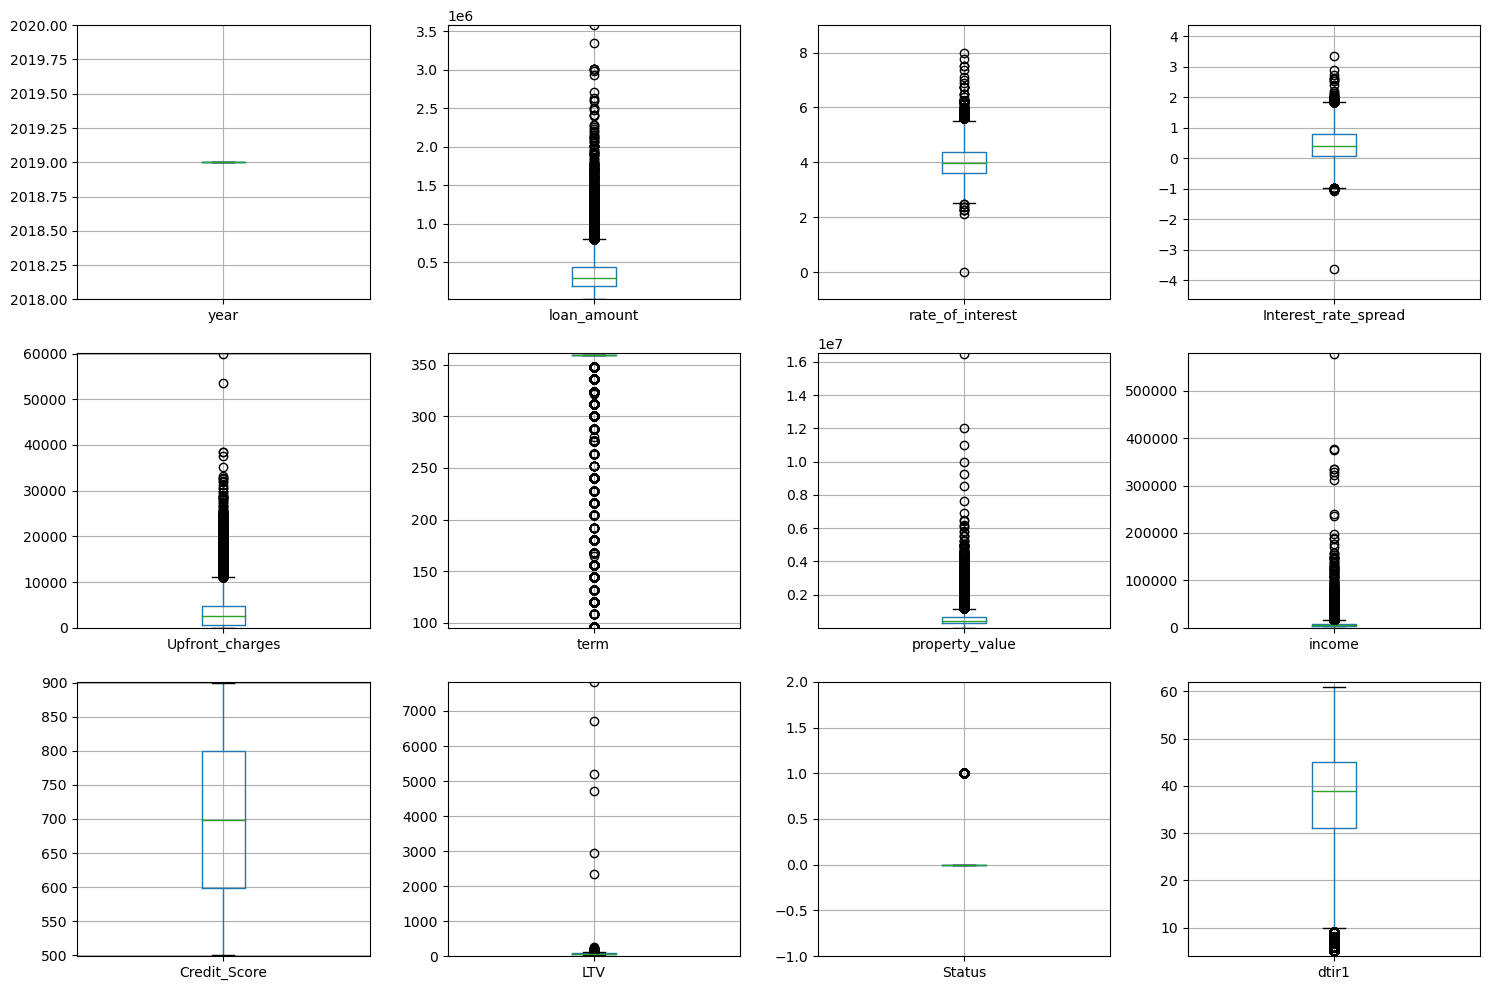

In [40]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop('ID')
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    boxplot = df.boxplot(column=col)
    plt.grid(True)
    min_val = df[col].min() - 1
    max_val = df[col].max() + 1
    plt.ylim(min_val, max_val)
plt.tight_layout()
plt.show()

It seems like all values of year are 2019, let's check that

In [41]:
df["year"].value_counts()

year
2019    148670
Name: count, dtype: int64

It means this column cannot be used to train the ML model because it doesn't provide any useful information. We can simply delete it.

In [42]:
df = df.drop(columns="year")

### Loan Defaults based on business type and loan purpose

In [12]:
df.pivot_table(
    index='business_or_commercial',
    columns='loan_purpose',
    values='Status',
    aggfunc='sum'
)

loan_purpose,p1,p2,p3,p4
business_or_commercial,,,,
b/c,1812,205,2973,2168
nob/c,7123,878,11023,10422


### Let's check who borrows more money

In [44]:
df['loan_amount'].describe()

count    1.486700e+05
mean     3.311177e+05
std      1.839093e+05
min      1.650000e+04
25%      1.965000e+05
50%      2.965000e+05
75%      4.365000e+05
max      3.576500e+06
Name: loan_amount, dtype: float64

In [45]:
median_loan_amount = df['loan_amount'].median()
df['borrows_less'] = df['loan_amount'].map(lambda x: x < median_loan_amount)

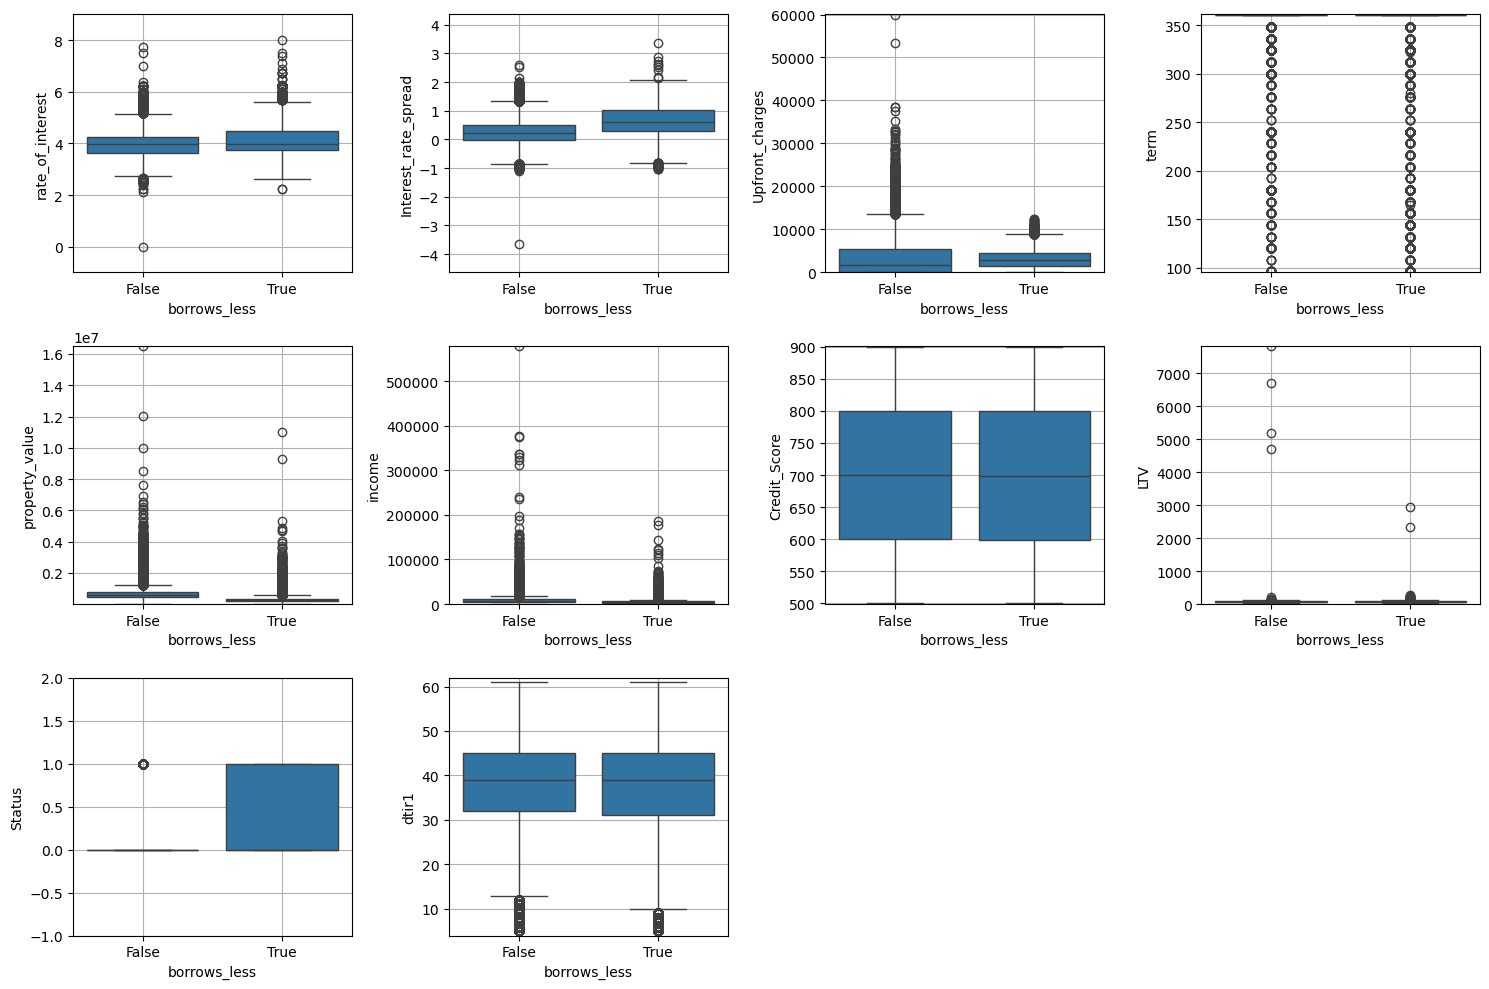

In [48]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop('ID')
num_cols = num_cols.drop('loan_amount')
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df, x='borrows_less', y=col)
    min_val = df[col].min() - 1
    max_val = df[col].max() + 1
    plt.grid(True)
    plt.ylim(min_val, max_val)
plt.tight_layout()
plt.show()

Significant differences can be seen on plots: rate_of_interest, interest_rate_spread, property_value, upfront_charges and Status.
Let's first take a look at Status values based on who borrows less.

In [54]:
df.groupby(by=['borrows_less', 'Status'])["Status"].count()

borrows_less  Status
False         0         59603
              1         16901
True          0         52428
              1         19738
Name: Status, dtype: int64

In [57]:
(df.groupby(by=['borrows_less', 'Status'])["Status"].count() / df.groupby('borrows_less')["Status"].count() * 100).round(2)

borrows_less  Status
False         0         77.91
              1         22.09
True          0         72.65
              1         27.35
Name: Status, dtype: float64

In [59]:
increase = (27.35/22.09 - 1)*100
print(f'Among people that borrow less money than median value deafult happens {increase:.2f}% more  often')

Among people that borrow less money than median value deafult happens 23.811679492983263% more  often


Among people that borrow less money than median value deafult happens more  often